<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/MobileNetV3_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
import gdown

# Especifique o ID do arquivo e o nome do arquivo de saída
file_id = '1aX48j7lKyE0c66tMZEesOwNncFbyvu6X'
output = 'dataset.zip'

# Baixe o arquivo do Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

!unzip dataset.zip

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras

In [15]:
train_dir = pathlib.Path('../content/dataset_3/test')
val_dir = pathlib.Path('../content/dataset_3/valid')
test_dir = pathlib.Path('../content/dataset_3/test')
train_image_count = len(list(train_dir.glob('*/*.jpg')))
train_image_count

334

In [16]:
batch_size = 32
image_width = 224
image_height = 224

train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    #validation_split=0.5,
    #subset='training',
    image_size=(image_height, image_width),
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [17]:
class_names = [
"chilli pepper",
"pineapple",
"cucumber",
"capsicum",
"mango",
"cauliflower",
"tomato",
"cabbage",
"bell pepper",
"pomegranate",
"apple",
"eggplant",
 "lemon",
"sweetcorn",
"paprika",
"turnip",
"corn",
"grapes",
"onion",
"peas",
"raddish",
"potato",
"spinach",
"soy beans",
"kiwi",
"pear",
"carrot",
"ginger",
"watermelon",
"garlic",
"sweetpotato",
"beetroot",
"orange",
"jalepeno",
"banana",
"lettuce"]

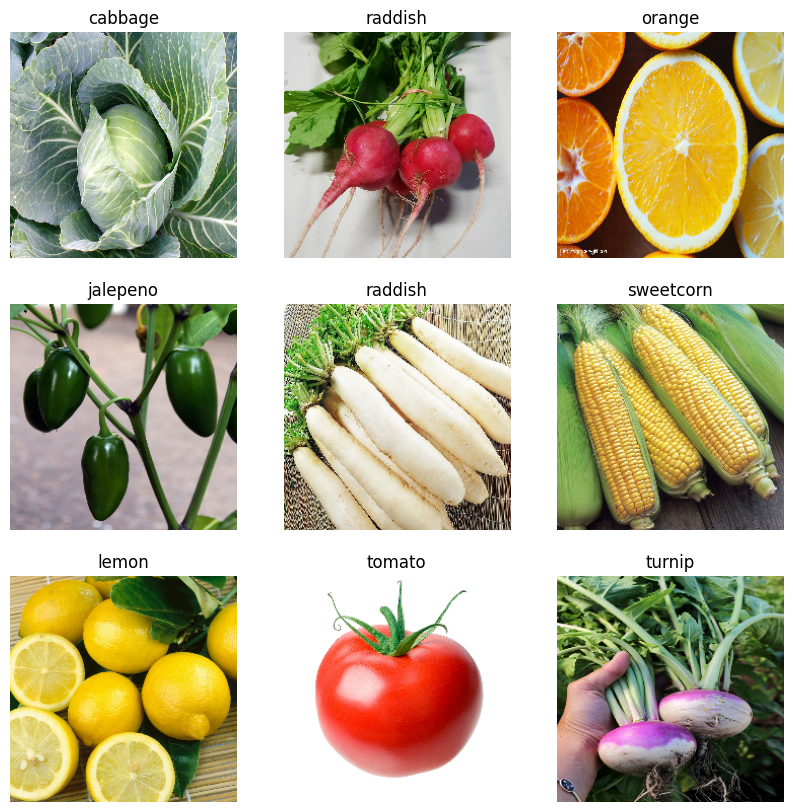

In [27]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [28]:
base_model = keras.applications.MobileNetV3Small(input_shape=(image_width, image_height, 3),
                                            classes=33,
                                            include_top=False,
                                            weights='imagenet')

4334752/4334752 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False
base_model.summary()

In [30]:
data_augmentation = keras.models.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.2)
])

In [32]:
num_classes = len(class_names)
inputs = keras.Input(shape=(image_width, image_height, 3))
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 36)                20772     
                                                                 
Total params: 959892 (3.66 MB)
Trainable params: 20772 (81.

In [34]:
initial_epochs = 10

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/10
12/12 [==============================] - 16s 759ms/step - loss: 3.8906 - accuracy: 0.0418 - val_loss: 3.0932 - val_accuracy: 0.2023
Epoch 2/10
12/12 [==============================] - 11s 664ms/step - loss: 3.0208 - accuracy: 0.1699 - val_loss: 2.3899 - val_accuracy: 0.4444
Epoch 3/10
12/12 [==============================] - 11s 649ms/step - loss: 2.3695 - accuracy: 0.4206 - val_loss: 1.8451 - val_accuracy: 0.6496
Epoch 4/10
12/12 [==============================] - 11s 644ms/step - loss: 1.7932 - accuracy: 0.5933 - val_loss: 1.4332 - val_accuracy: 0.7664
Epoch 5/10
12/12 [==============================] - 11s 659ms/step - loss: 1.4482 - accuracy: 0.6825 - val_loss: 1.1483 - val_accuracy: 0.8063
Epoch 6/10
12/12 [==============================] - 11s 644ms/step - loss: 1.1755 - accuracy: 0.7549 - val_loss: 0.9320 - val_accuracy: 0.8661
Epoch 7/10
12/12 [==============================] - 11s 646ms/step - loss: 1.0076 - accuracy: 0.8022 - val_loss: 0.7824 - val_accuracy: 0.8917

In [35]:
initial_epochs = len(history.history['accuracy'])

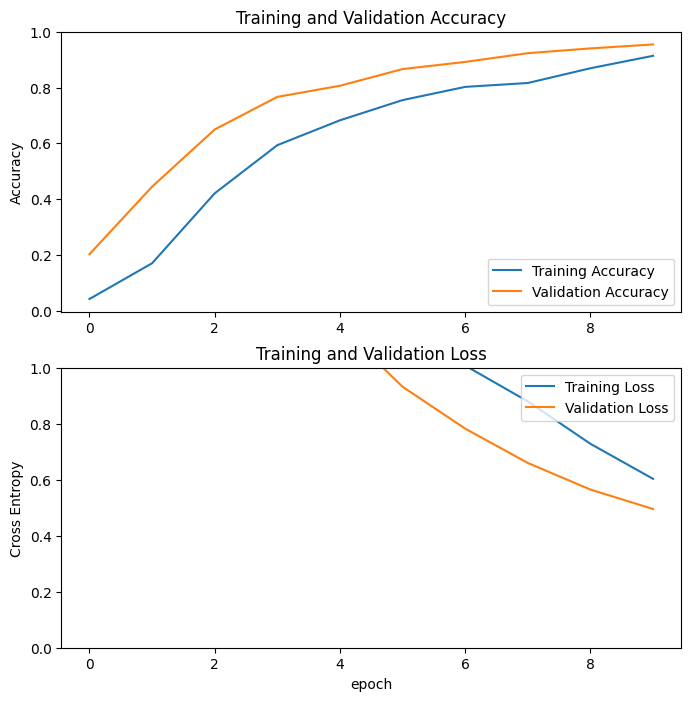

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 0s 155ms/step


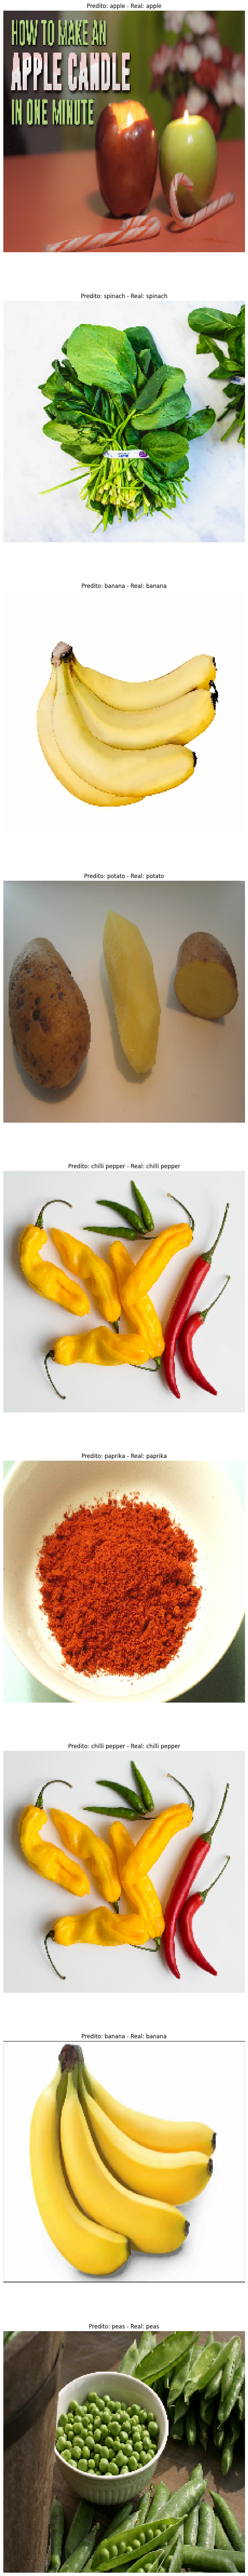

In [39]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 100))
for images, labels in test_ds.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
        ax = plt.subplot(9, 1, i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predito: {class_names[pred]} - Real: {class_names[labels[i]]}')
        plt.axis('off')

In [40]:
test_ds_unbatch = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=None,
    shuffle=False,
    image_size=(image_height, image_width),
    batch_size=image_height,
)
images = list(test_ds_unbatch.map(lambda x, y: x))
labels = list(test_ds_unbatch.map(lambda x, y: y))

Found 359 files belonging to 36 classes.


In [41]:
y_test = np.concatenate([y for x, y in test_ds_unbatch], axis=0)
prediction = model.predict(test_ds_unbatch)
pred = np.argmax(prediction,axis=1)
print(pred)
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test)

2/2 [==============================] - 6s 1s/step
[ 0  0  0  0  0  0  0  0 19  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  5  3  3  4  4  4  4  4  4  4  4  4
  4  5  5  5  5  3 15  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8  8  3  8  8 15  8  8  8 31  9  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12
 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14
 14  5 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16
 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 30 18 18 19 19 19
 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21
 17 21 21 22 22 22 22  0 22 11 22 22 22 23 23 23 23 23 23 23 23 23 23 24
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26
 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 14 28  2 28
 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31  9
 

0.9526462395543176

In [42]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(pred, y_test)
confusion_matrix = confusion_matrix.astype(int)

In [43]:
import plotly.figure_factory as ff
def plot_confusion_matrix(z,x,y):
    x = x
    y = x[::-1].copy()
    z = z[::-1]
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z[::-1]]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<i><b>Matriz de Confusão</b></i>',
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Valor Previsto",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Valor Real",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))
    fig.update_yaxes(type='category')
    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()

In [44]:
import plotly.express as px

z = confusion_matrix
fig = px.imshow(z)
fig.show()

In [46]:
z = confusion_matrix[:20,:20]
fig = px.imshow(z)
fig.show()

In [47]:
base_model.trainable = True

# Fine-tune daqui pra frente
fine_tune_at = 10

# Congela as camadas antes do Finetuning
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [48]:
base_learning_rate = 0.0001
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),# use low LR to avoid overfit
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 36)                20772     
                                                                 
Total params: 959892 (3.66 MB)
Trainable params: 947172 (3.

In [49]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds,
                         callbacks=[early_stop])

Epoch 10/20
12/12 [==============================] - 23s 967ms/step - loss: 0.5553 - accuracy: 0.8774 - val_loss: 0.3989 - val_accuracy: 0.9516
Epoch 11/20
12/12 [==============================] - 13s 838ms/step - loss: 0.4840 - accuracy: 0.9053 - val_loss: 0.3579 - val_accuracy: 0.9516
Epoch 12/20
12/12 [==============================] - 14s 854ms/step - loss: 0.4333 - accuracy: 0.9109 - val_loss: 0.3293 - val_accuracy: 0.9487
Epoch 13/20
12/12 [==============================] - 14s 864ms/step - loss: 0.4210 - accuracy: 0.9164 - val_loss: 0.3049 - val_accuracy: 0.9487
Epoch 14/20
12/12 [==============================] - 14s 843ms/step - loss: 0.3886 - accuracy: 0.9081 - val_loss: 0.2834 - val_accuracy: 0.9516
Epoch 15/20
12/12 [==============================] - 13s 817ms/step - loss: 0.3443 - accuracy: 0.9387 - val_loss: 0.2652 - val_accuracy: 0.9516
Epoch 16/20
12/12 [==============================] - 13s 838ms/step - loss: 0.3457 - accuracy: 0.9192 - val_loss: 0.2479 - val_accuracy:

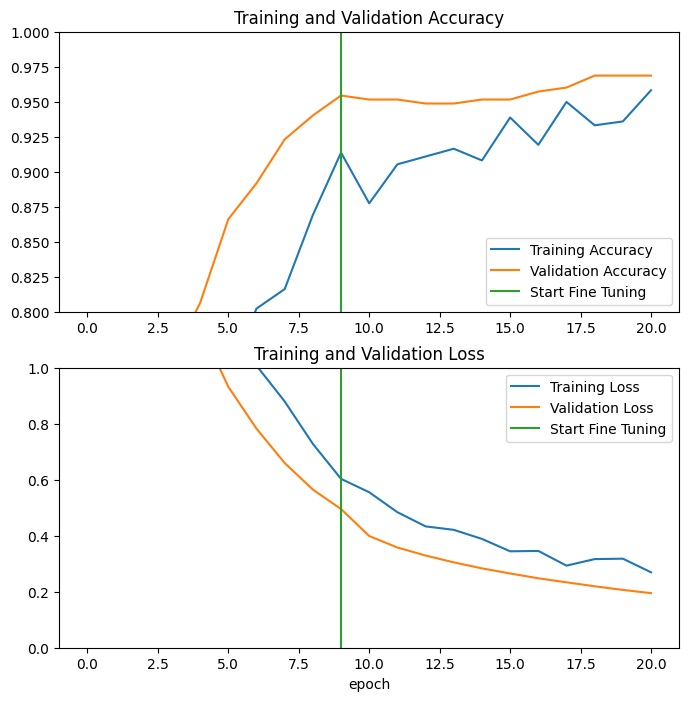

In [50]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [51]:
model.evaluate(test_ds)

12/12 [==============================] - 6s 139ms/step - loss: 0.2000 - accuracy: 0.9666


[0.20002508163452148, 0.9665738344192505]